In [62]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score

#defining functions for later us 
#calculates the r value and squared loss of a classifier/model
#takes four arguments, the chosen classifier and the splitted training set 
def calc_error_r(classi, X_train, X_test, y_train, y_test):
    #fit the classifier with the X and y trainings sets
    classi.fit(X_train, y_train)
    #try to predict the the values of y_test given the X_test as input data 
    y_test_predict = classi.predict(X_test)
    
    print("r square: ", format(r2_score(y_test, y_test_predict)), "squared loss: ", format(mean_squared_error(y_test, y_test_predict)), "score accuracy: ", format(accuracy_score(y_test, y_test_predict.round())))

    
def calc_score(classi, X_train, X_test, y_train, y_test):
    classi.fit(X_train, y_train)
    print(classi.score(X_test, y_test))
    

In [63]:
#import data
data = pd.read_csv("datasets-35847-51854-Churn Modeling.csv")
old_data = pd.read_csv("datasets-35847-51854-Churn Modeling.csv")
#show the first 5 lines of data to see if the data has been loaded correctly 
print(data.head())

# preprocessing#################################################################################

#change string values to int## Male = 0, Female = 1, Germany = 0, Spain = 1, France = 2
#we replace every chosen feature value with the following syntax "feature": <int>
data["Gender"].replace({"Male": 0, "Female": 1}, inplace=True)
data["Geography"].replace({"Germany": 0, "Spain": 1, "France": 2}, inplace=True)
old_data["Gender"].replace({"Male": 0, "Female": 1}, inplace=True)
old_data["Geography"].replace({"Germany": 0, "Spain": 1, "France": 2}, inplace=True)

#Drop Data that is not relevant for the Data Analysis 
#the reasing of the features that are possibly important can be seen in the project report 
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
old_data = old_data.drop(['RowNumber','CustomerId','Surname'],axis=1)



#check if there are any missing values in the data 
#there is no missing data 

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1          608          1       1   41       1   83807.86              1   
2          502          2       1   42       8  159660.80              3   
4          850          1       1   43       2  125510.82              1   
5          645          1       0   44       8  113755.78              2   
6          822          2       0   50       7       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Balance_per_Tenure  \
1          0               1        112542.58       0          83807.8600   
2          1               0        113931.57       1          19957.6000   
4          1               1         79084.10       0          62755.4100   
5          1               0        149756.71       1          14219.4725   
6          1               1         10062.80       0              0.0000   

   EstimatedSalary_per_Tenure  
1               112542.580000  
2               

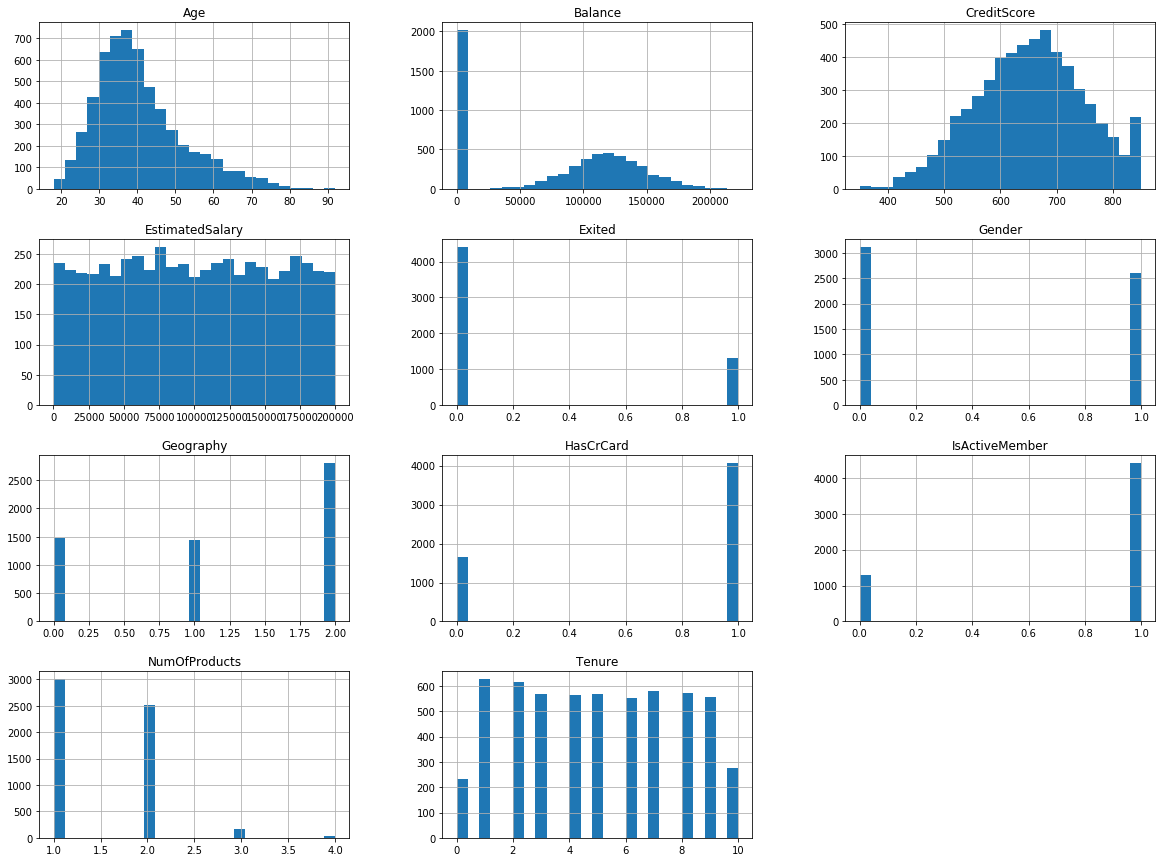

IsActiveMember                1.000000
Geography                     0.155278
NumOfProducts                 0.067777
CreditScore                   0.038164
EstimatedSalary_per_Tenure    0.000050
Tenure                       -0.008185
HasCrCard                    -0.014665
EstimatedSalary              -0.019473
Balance_per_Tenure           -0.052886
Gender                       -0.112342
Balance                      -0.119638
Age                          -0.213969
Exited                       -1.000000
Name: IsActiveMember, dtype: float64


Exited                        1.000000
Age                           0.213969
Balance                       0.119638
Gender                        0.112342
Balance_per_Tenure            0.052886
EstimatedSalary               0.019473
HasCrCard                     0.014665
Tenure                        0.008185
EstimatedSalary_per_Tenure   -0.000050
CreditScore                  -0.038164
NumOfProducts                -0.067777
Geography                

In [64]:
# get all rows with Exited and IsActiveMember = 0
values = data[(data['Exited'] == 0) & (data['IsActiveMember'] == 0)].index
#Delete these row indexes from dataFrame
data.drop(values , inplace=True)

# get all rows with Exited and IsActiveMember = 1
values = data[(data['Exited'] == 1) & (data['IsActiveMember'] == 1)].index
#Delete these row indexes from dataFrame
data.drop(values , inplace=True)

#add features that could be important for a better result 
data["Balance_per_Tenure"] = data["Balance"]/data["Tenure"]
data["EstimatedSalary_per_Tenure"] = data["EstimatedSalary"]/data["Tenure"]
#due to the calculation with 0 inf values could be produced, change them to 0
data = data.replace([np.inf, -np.inf], 0)

print(data.head())

#see correlations between features
#draw histrograms in order to see the distributions of the features 
data.hist(["CreditScore","Balance","Age","Tenure","EstimatedSalary","NumOfProducts", "Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"],bins=25, figsize=(20,15))
plt.show()

#plot the data in order to see outliers
import matplotlib.pyplot as plt



#look for correlations between the feature vectors
corr_matrix = data.corr()
print(corr_matrix["IsActiveMember"].sort_values(ascending=False))
print("\n")
print(corr_matrix["Exited"].sort_values(ascending=False))






In [65]:
#Prepare the data for testing and training set for Exited##############################################################
#take the data before it has been changed //1000 rows
X_Exited_normal = old_data.iloc[:,:-1]
#take every data without Exited feature
X_Exited_new = data.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
#take all positive correlated features
X_Exited_corr = data.iloc[:,[2,3,5,9]]
#continious data
X_Exited_corr_ext = data.iloc[:, [2,3,5,9,11,12]]


#PCA? We could apply PCA but the data is not really in the shape to reduce the dimensions. If we would do that the data
#possibly be falsified due to the high amount of outliers 

#extract the exited feature
y_Exited_normal = old_data.iloc[:,-1].values
y_Exited_new = data.iloc[:,-3].values

# Splitting the data into the Training set and Test set for every case
from sklearn.model_selection import train_test_split
X_train_Exited_normal, X_test_Exited_normal, y_train_Exited_normal, y_test_Exited_normal = train_test_split(X_Exited_normal, y_Exited_normal, test_size=0.2, random_state=10)
X_train_Exited_new, X_test_Exited_new, y_train_Exited_new, y_test_Exited_new = train_test_split(X_Exited_new, y_Exited_new, test_size=0.2, random_state=10)
X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr = train_test_split(X_Exited_corr, y_Exited_new, test_size=0.2, random_state=10)
X_train_Exited_ext, X_test_Exited_ext, y_train_Exited_ext, y_test_Exited_ext = train_test_split(X_Exited_corr_ext, y_Exited_new, test_size=0.2, random_state=10)

In [66]:
#credit score
X_Credit_new = data.iloc[:,[1,2,3,4,5,6,7,8,9]]
print(X_Credit_new)
y_Credit_new = data.iloc[:,[0]].values
print(y_Credit_new)

X_train_Credit, X_test_Credit, y_train_Credit, y_test_Credit = train_test_split(X_Credit_new, y_Credit_new, test_size=0.2, random_state=10)

#solve problem of continious values
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train_Credit = encoder.fit_transform(y_train_Credit)
y_test_Credit = encoder.fit_transform(y_test_Credit)

      Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1             1       1   41       1   83807.86              1          0   
2             2       1   42       8  159660.80              3          1   
4             1       1   43       2  125510.82              1          1   
5             1       0   44       8  113755.78              2          1   
6             2       0   50       7       0.00              2          1   
7             0       1   29       4  115046.74              4          1   
8             2       0   44       4  142051.07              2          0   
9             2       0   27       2  134603.88              1          1   
14            1       1   35       7       0.00              2          1   
15            0       0   45       3  143129.41              2          0   
16            0       0   58       1  132602.88              1          1   
17            1       1   24       9       0.00              2          1   

C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#############################Prepare the data for testing and training set for NumberofProd##############################################################
#take all positive correlated features
X_prod_new = data.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12]]
#continious data
y_prod_new = data.iloc[:,-7].values

X_train_Prod, X_test_Prod, y_train_Prod, y_test_Prod = train_test_split(X_Prod_new, y_Prod_new, test_size=0.2, random_state=10)


In [69]:
#Prepare the data for testing and training set for StillActive##############################################################
#take the data before it has been changed //1000 rows
X_Active_normal = old_data.iloc[:,[0,1,2,3,4,5,6,7,9,10]]
#take every data without Exited feature
X_Active_new = data.iloc[:,[1,2,3,4,5,6,7,9,10,11,12]]

#extract the exited feature
y_Active_normal = old_data.iloc[:,-1].values
y_Active_new = data.iloc[:,-3].values


X_train_Active_normal, X_test_Active_normal, y_train_Active_normal, y_test_Active_normal = train_test_split(X_Active_normal, y_Active_normal, test_size=0.2, random_state=10)
X_train_Active_new, X_test_Active_new, y_train_Active_new, y_test_Active_new = train_test_split(X_Active_new, y_Active_new, test_size=0.2, random_state=10)

In [70]:
#import important libs
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# imputation Exited normal
X_train_Exited_normal = imputer.fit_transform(X_train_Exited_normal)
X_test_Exited_normal = imputer.transform(X_test_Exited_normal)
# imputation Exited_new
X_train_Exited_new = imputer.fit_transform(X_train_Exited_new)
X_test_Exited_new = imputer.transform(X_test_Exited_new)
# imputation Exited_corr
X_train_Exited_corr = imputer.fit_transform(X_train_Exited_corr)
X_test_Exited_corr = imputer.fit_transform(X_test_Exited_corr)
# imputation Exited_ext
X_train_Exited_ext = imputer.fit_transform(X_train_Exited_ext)
X_test_Exited_ext = imputer.fit_transform(X_test_Exited_ext)

#imputation Credit_new
X_train_Credit = imputer.fit_transform(X_train_Credit)
X_test_Credit = imputer.transform(X_test_Credit)

#imputation Prod
X_train_Prod = imputer.fit_transform(X_train_Prod)
X_test_Prod = imputer.transform(X_test_Prod)

#imputation Active_normal
X_train_Active_normal = imputer.fit_transform(X_train_Active_normal)
X_test_Active_normal = imputer.transform(X_test_Active_normal)
#imputation Active_new
X_train_Active_new = imputer.fit_transform(X_train_Active_new)
X_test_Active_new = imputer.fit_transform(X_test_Active_new)


In [71]:
#import libs
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we use robustscaler because it is robust to outliers
rc = RobustScaler()

# scaling Exited normal 
X_train_Exited_normal = rc.fit_transform(X_train_Exited_normal)
X_test_Exited_normal = rc.transform(X_test_Exited_normal)
# scaling Exited_new 
X_train_Exited_new = rc.fit_transform(X_train_Exited_new)
X_test_Exited_new = rc.transform(X_test_Exited_new)
# scaling Exited_corr
X_train_Exited_corr = rc.fit_transform(X_train_Exited_corr)
X_test_Exited_corr = rc.transform(X_test_Exited_corr)
# scaling Exited_ext
X_train_Exited_ext = rc.fit_transform(X_train_Exited_ext)
X_test_Exited_ext = rc.transform(X_test_Exited_ext)

#scaling Credit
X_train_Credit = rc.fit_transform(X_train_Credit)
X_test_Credit = rc.transform(X_test_Credit)

#scaling Prod
X_train_Prod = rc.fit_transform(X_train_Prod)
X_test_Prod = rc.transform(X_test_Prod)

# scaling Active
X_train_Active_normal = rc.fit_transform(X_train_Active_normal)
X_test_Active_normal = rc.transform(X_test_Active_normal)
# scaling Active
X_train_Active_new = rc.fit_transform(X_train_Active_new)
X_test_Active_new = rc.transform(X_test_Active_new)

In [72]:
#defining the models that are needed for the function
#logistic regression 
from sklearn.linear_model import LogisticRegression
#define mean square error and r2 score
from sklearn.metrics import mean_squared_error, r2_score
clf_lg = LogisticRegression(random_state=0, multi_class='auto')

#linear regression
from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression()

#svm
from sklearn import svm
clf_svm = svm.SVR()

#ridge reg.
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha=1.0)



In [73]:
#logistic regression##################################################
print("old data logistic reg for Exited: ")
calc_error_r(clf_lg, X_train_Exited_normal, X_test_Exited_normal, y_train_Exited_normal, y_test_Exited_normal)
print("new data logistic reg: ")
calc_error_r(clf_lg, X_train_Exited_new, X_test_Exited_new, y_train_Exited_new, y_test_Exited_new)
print("corr with old data logistic reg: ")
calc_error_r(clf_lg, X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr)
print("corr with new data logistic reg: ")
calc_error_r(clf_lg, X_train_Exited_ext, X_test_Exited_ext, y_train_Exited_ext, y_test_Exited_ext)
print("\n")

print("old data logistic reg for StillActive: ")
calc_error_r(clf_lg, X_train_Active_normal, X_test_Active_normal, y_train_Active_normal, y_test_Active_normal) 
print("new data logistic reg for StillActive: ")
calc_error_r(clf_lg, X_train_Active_new, X_test_Active_new, y_train_Active_new, y_test_Active_new) 

#Linear regression credit
print("new data linear Reg for Credit: ")
calc_error_r(clf_lr, X_train_Credit, X_test_Credit, y_train_Credit, y_test_Credit)


#linear regression##################################################
print("old data lin regression for Exited: ")
calc_error_r(clf_lr, X_train_Exited_normal, X_test_Exited_normal, y_train_Exited_normal, y_test_Exited_normal)
print("new data: ")
calc_error_r(clf_lr, X_train_Exited_new, X_test_Exited_new, y_train_Exited_new, y_test_Exited_new)
print("corr with old data: ")
calc_error_r(clf_lr, X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr)
print("corr with new data:")
calc_error_r(clf_lr, X_train_Exited_ext, X_test_Exited_ext, y_train_Exited_ext, y_test_Exited_ext)
print("\n")

#svm#################################################################
print("old data svm for Exited: ")
calc_error_r(clf_svm, X_train_Exited_normal, X_test_Exited_normal, y_train_Exited_normal, y_test_Exited_normal)
print("new data: ")
calc_error_r(clf_svm, X_train_Exited_new, X_test_Exited_new, y_train_Exited_new, y_test_Exited_new)
print("corr with old data: ")
calc_error_r(clf_svm, X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr)
print("corr with new data: ")
calc_error_r(clf_svm, X_train_Exited_ext, X_test_Exited_ext, y_train_Exited_ext, y_test_Exited_ext)
print("\n")

#ridge regression#####################################################
print("old data ridge for Exited: ")
calc_error_r(clf_ridge, X_train_Exited_normal, X_test_Exited_normal, y_train_Exited_normal, y_test_Exited_normal)
print("new data: ")
calc_error_r(clf_ridge, X_train_Exited_new, X_test_Exited_new, y_train_Exited_new, y_test_Exited_new)
print("corr with old data: ")
calc_error_r(clf_ridge, X_train_Exited_corr, X_test_Exited_corr, y_train_Exited_corr, y_test_Exited_corr)
print("corr with new data: ")
calc_error_r(clf_ridge, X_train_Exited_ext, X_test_Exited_ext, y_train_Exited_ext, y_test_Exited_ext)



old data logistic reg for Exited: 
r square:  -0.18633581412670663 squared loss:  0.1975 score accuracy:  0.8025
new data logistic reg: 
r square:  1.0 squared loss:  0.0 score accuracy:  1.0
corr with old data logistic reg: 
r square:  -0.36011420488321355 squared loss:  0.2395104895104895 score accuracy:  0.7604895104895105
corr with new data logistic reg: 
r square:  -0.36507812533899164 squared loss:  0.2403846153846154 score accuracy:  0.7596153846153846


old data logistic reg for StillActive: 
r square:  1.0 squared loss:  0.0 score accuracy:  1.0
new data logistic reg for StillActive: 
r square:  1.0 squared loss:  0.0 score accuracy:  1.0
new data linear Reg for Credit: 
r square:  -0.4041307261530396 squared loss:  11352.59743564217 score accuracy:  0.0026223776223776225
old data lin regression for Exited: 
r square: 

C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 0.1390949752609102 squared loss:  0.14332260761353893 score accuracy:  0.794
new data: 
r square:  1.0 squared loss:  5.575907790376079e-31 score accuracy:  1.0
corr with old data: 
r square:  0.0801481715922362 squared loss:  0.1619821048174257 score accuracy:  0.7613636363636364
corr with new data:
r square:  0.07974017766485741 squared loss:  0.16205395086161298 score accuracy:  0.7596153846153846


old data svm for Exited: 


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r square:  0.2788933285026425 squared loss:  0.12004911756420858 score accuracy:  0.849
new data: 
r square:  0.9907437500733575 squared loss:  0.001629987351798842 score accuracy:  1.0
corr with old data: 


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r square:  0.027690213173140577 squared loss:  0.17121973446247254 score accuracy:  0.7832167832167832
corr with new data: 


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r square:  -0.010054588742584691 squared loss:  0.17786643806343086 score accuracy:  0.7744755244755245


old data ridge for Exited: 
r square:  0.13909619471885648 squared loss:  0.14332240459939952 score accuracy:  0.794
new data: 
r square:  0.9999983241512479 squared loss:  2.951100382018597e-07 score accuracy:  1.0
corr with old data: 
r square:  0.08013972828888172 squared loss:  0.1619835916482464 score accuracy:  0.7613636363636364
corr with new data: 
r square:  0.07973691546968542 squared loss:  0.16205452532069864 score accuracy:  0.7596153846153846


In [75]:
#######faster way##############
##############using cross validation#################################
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

print("For Exited:")
print("cross validationc + ridge regression old data: ",cross_val_score(clf_ridge, X_train_Exited_normal, y_train_Exited_normal))
print("cross validationc + ridge regression new data: ",cross_val_score(clf_ridge, X_train_Exited_new, y_train_Exited_new))
print("cross validation + SVM old data: ",cross_val_score(clf_svm, X_train_Exited_normal, y_train_Exited_normal))
print("cross validation + SVM new data: ",cross_val_score(clf_svm, X_train_Exited_new, y_train_Exited_new))
print("cross validation + randomforest old data: ",cross_val_score(RandomForestClassifier(n_estimators=40), X_train_Exited_normal, y_train_Exited_normal))
print("cross validation + randomforest new data: ",cross_val_score(RandomForestClassifier(n_estimators=40), X_train_Exited_new, y_train_Exited_new))

print("For StillActive")
print("cross validationc + ridge regression old data: ",cross_val_score(clf_ridge, X_train_Active_new, y_train_Active_new))

print("For Balance")
print("cross validationc + linear regression new data: ",cross_val_score(clf_lr, X_train_Credit, y_train_Credit))
print("cross validationc + ridge regression new data: ",cross_val_score(clf_ridge, X_train_Credit, y_train_Credit))
print("cross validation + SVM new data: ",cross_val_score(clf_svm, X_train_Credit, y_train_Credit))
print("cross validation + randomforest new data: ",cross_val_score(RandomForestClassifier(n_estimators=40), X_train_Credit, y_train_Credit))
print("For Prod")
print("cross validationc + linear regression new data: ",cross_val_score(clf_lr, X_train_Prod, y_train_Prod))


For Exited:
cross validationc + ridge regression old data:  [0.12788273 0.16592164 0.13979245]
cross validationc + ridge regression new data:  [0.99999614 0.99999628 0.9999961 ]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to accou

cross validation + SVM old data:  [0.29665392 0.28491497 0.29955497]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

cross validation + SVM new data:  [0.98874863 0.98884102 0.98853599]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


cross validation + randomforest old data:  [0.85607196 0.86009002 0.85971493]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


cross validation + randomforest new data:  [1. 1. 1.]
For StillActive
cross validationc + ridge regression old data:  [0.99999615 0.99999629 0.99999611]
For Balance
cross validationc + linear regression new data:  [ 0.00052395  0.00041049 -0.00298844]
cross validationc + ridge regression new data:  [ 0.00052746  0.00041373 -0.00297764]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

cross validation + SVM new data:  [ 0.00023921 -0.00252557  0.00061994]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


cross validation + randomforest new data:  [0.00059737 0.00395517 0.00072307]
For Prod
cross validationc + linear regression new data:  [1. 1. 1.]


C:\Users\Eiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
